대회용 데이터: train(feature, label), test(feature), submisison  
    
현실용 데이터: train(feature, label), train를 test화 시킨다.

### 1. Import packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# 한글 깨짐 방지
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2. Data loading & Preprocessing :
#### 2-1) Data loading

- 일자
- 요일
- 본사정원수
- 본사휴가자수
- 본사출장자수
- 시간외근무명령서승인건수
- 현본사소속재택근무자수
- 조식메뉴
- 중식메뉴
- 석식메뉴
- 중식계
- 석식계

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")

In [4]:
print(train.shape)
train.head(3)

# label이 2개 -> 각가 2개로 나눠서 해야 함. (중식계, 석식계)
# ML로 읽으려면 숫자로 바꿔야 함. 
# 날짜, 사람 수, 메뉴, 계

(1205, 12)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [5]:
print(test.shape)
test.head(3)

(50, 10)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [6]:
print(submission.shape)
submission.head(3)

(50, 3)


,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


#### 2-2) Data profiles : missing values & etc.

In [8]:
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [9]:
test.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
dtype: int64

In [11]:
# label이 분류형태이면 비율 분포를 확인해봐야한다. (이 경우는 회귀여서 상관X)
train["중식계"]

0       1039.0
1        867.0
2       1017.0
3        978.0
4        925.0
         ...  
1200    1093.0
1201     832.0
1202     579.0
1203    1145.0
1204    1015.0
Name: 중식계, Length: 1205, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='석식계', ylabel='Density'>

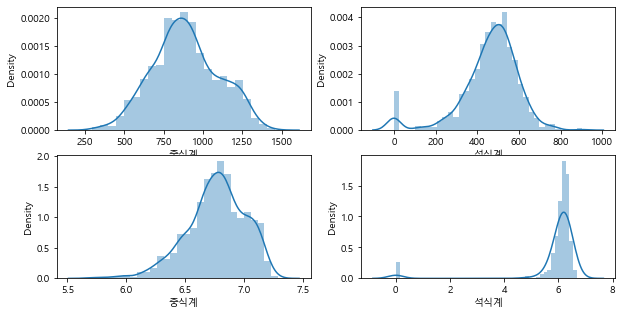

In [28]:
figure, ((a1, a2), (b1,b2))=plt.subplots(2,2)
figure.set_size_inches(10,5)

sns.distplot(train["중식계"], ax=a1)
sns.distplot(train["석식계"], ax=a2)

sns.distplot(np.log(train["중식계"]), ax=b1)
sns.distplot(np.log(train["석식계"]+1), ax=b2)

#데이터가 몰려있는 지 그래프로 확인해보기  
# 데이터가 몰려있다면 statistics transformation을 이용

# 석식의 0 데이터 신경쓰기 

#### 2-3) Data encoding

    문자열 데이터 -> 숫자화

In [29]:
train.head(1)

# 일자, 요일을 숫자화하기 - 연, 월, 일, 주차,

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [57]:
datetime=pd.to_datetime(train["일자"])

In [106]:
train["YY"]=datetime.dt.year
train["MM"]=datetime.dt.month
train["dd"]=datetime.dt.day
train["DD"]=datetime.dt.day
train["DOF"]=datetime.dt.dayofweek
train["WOY"]=datetime.dt.weekofyear

train.columns

<ipython-input-106-3338f84f3578>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train["WOY"]=datetime.dt.weekofyear


Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'YY', 'MM', 'dd',
       'DOF', 'WOY', 'DD', '식사대상수', 'rate1', 'rate2'],
      dtype='object')

In [107]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식계,YY,MM,dd,DOF,WOY,DD,식사대상수,rate1,rate2
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,2016,2,1,0,5,1,2401.0,0.076894,0.091503


In [108]:
datetime=pd.to_datetime(test["일자"])

In [111]:
test["YY"]=datetime.dt.year
test["MM"]=datetime.dt.month
test["dd"]=datetime.dt.day
test["DD"]=datetime.dt.day
test["DOF"]=datetime.dt.dayofweek
test["WOY"]=datetime.dt.weekofyear

<ipython-input-111-9069e5b75f7a>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test["WOY"]=datetime.dt.weekofyear


In [112]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,YY,MM,dd,DOF,WOY,DD
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,1,27,2,4,27


틀을 만들고 수정하면서 원사이클로 처리하기 - basic coding  
=> 파이프라이닝 구성  

### 3. Analysis :

#### 3-1) Visualization

<AxesSubplot:xlabel='WOY', ylabel='석식계'>

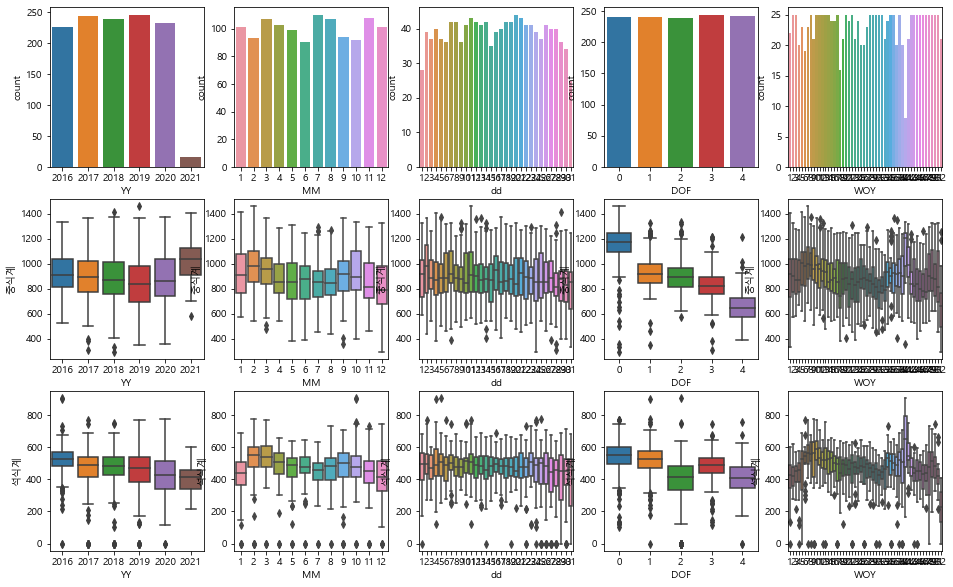

In [90]:
# timeline의 분포를 보기
# sns.countplot으로 
# 중식, 석식에 관련된 내용

figure, ax = plt.subplots(3,5)
figure.set_size_inches(16,10)

sns.countplot(data=train, x='YY', ax=ax[0,0])
sns.countplot(data=train, x='MM', ax=ax[0,1])
sns.countplot(data=train, x='dd', ax=ax[0,2])
sns.countplot(data=train, x='DOF', ax=ax[0,3])
sns.countplot(data=train, x='WOY', ax=ax[0,4])

sns.boxplot(data=train, x='YY', y="중식계", ax=ax[1,0])
sns.boxplot(data=train, x='MM', y="중식계", ax=ax[1,1])
sns.boxplot(data=train, x='dd', y="중식계", ax=ax[1,2])
sns.boxplot(data=train, x='DOF', y="중식계", ax=ax[1,3])
sns.boxplot(data=train, x='WOY', y="중식계", ax=ax[1,4])

sns.boxplot(data=train, x='YY', y="석식계", ax=ax[2,0])
sns.boxplot(data=train, x='MM', y="석식계", ax=ax[2,1])
sns.boxplot(data=train, x='dd', y="석식계", ax=ax[2,2])
sns.boxplot(data=train, x='DOF', y="석식계", ax=ax[2,3])
sns.boxplot(data=train, x='WOY', y="석식계", ax=ax[2,4])

# 연속과 범주형 -> boxplot

    중식계: 요일이 특이하게 나타남. 월요일엔 많이, 금요일엔 적게 이용함.   
    석식계: 연도가 갈수록 감소한다. 수요일과 금요일이 적다. -> 마찬가지로 요일의 영향이 있을 것

In [ ]:
'본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수'
                                                # 석식과 관련 있을 것

In [91]:
p_col="본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수".split(",")

In [92]:
train[p_col]

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,2601,50,150,238,0.0
1,2601,50,173,319,0.0
2,2601,56,180,111,0.0
3,2601,104,220,355,0.0
4,2601,278,181,34,0.0
...,...,...,...,...,...
1200,2983,75,198,4,391.0
1201,2983,92,231,462,351.0
1202,2983,255,248,1,303.0
1203,2983,107,153,616,327.0


In [113]:
train["식사대상수"]=train["본사정원수"]-train["본사휴가자수"]-train["본사출장자수"]-train["현본사소속재택근무자수"]
test["식사대상수"]=test["본사정원수"]-test["본사휴가자수"]-test["본사출장자수"]-test["현본사소속재택근무자수"]

In [114]:
train["식사대상수"]

0       2401.0
1       2378.0
2       2365.0
3       2277.0
4       2142.0
         ...  
1200    2319.0
1201    2309.0
1202    2177.0
1203    2396.0
1204    2369.0
Name: 식사대상수, Length: 1205, dtype: float64

In [115]:
# 정원 수 대비 식사대상수, 정원 수 대비 본사시간외근무명ㅇ령서승인건수

train["rate1"]=(train["본사정원수"]-train["식사대상수"])/train["본사정원수"]

train["rate2"]=train["본사시간외근무명령서승인건수"]/train["본사정원수"]

In [116]:
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식계,YY,MM,dd,DOF,WOY,DD,식사대상수,rate1,rate2
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,2016,2,1,0,5,27.0,2401.0,0.076894,0.091503
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,560.0,2016,2,2,1,5,28.0,2378.0,0.085736,0.122645


In [117]:
test["rate1"]=(test["본사정원수"]-test["식사대상수"])/test["본사정원수"]

test["rate2"]=test["본사시간외근무명령서승인건수"]/test["본사정원수"]

#### 3-2)

### 4. Modeling :

#### 4-1) Feature selection

In [118]:
# 공부시킬 것을 넣기
train.head(1)

# 중식계, 석식계는 맞춰야 할 label

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,석식계,YY,MM,dd,DOF,WOY,DD,식사대상수,rate1,rate2
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,331.0,2016,2,1,0,5,27.0,2401.0,0.076894,0.091503


In [119]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'YY', 'MM', 'dd',
       'DOF', 'WOY', 'DD', '식사대상수', 'rate1', 'rate2'],
      dtype='object')

In [120]:
f_names=['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수','YY', 'MM', 'dd',
       'DOF', 'WOY', '식사대상수', 'rate1','rate2']

# feature name - 숫자로 이루어진 것

In [121]:
f_label_l='중식계'
f_label_d='석식계'

In [122]:
X_train=train[f_names] 
y_train_l=train[f_label_l] #중식용 label
y_train_d=train[f_label_d] #석식용 label

In [123]:
X_train.head(1)
y_train_l.head(1)
y_train_d.head(1)

0    331.0
Name: 석식계, dtype: float64

In [124]:
X_test=test[f_names]


#### 4-2) Models : RandomForest & etc

In [125]:
from sklearn.ensemble import RandomForestRegressor

# 수치형 -> 회귀 

In [126]:
rf_reg_l=RandomForestRegressor(random_state=125)

rf_reg_d=RandomForestRegressor(random_state=125)
# 해당 수만큼의 random의 규칙성을 갖는다.
# 영향을 주는 요소를 줄이기 위해서 random_state를 준다.

In [127]:
rf_reg_l.fit(X_train, y_train_l)

# 문제와 정답을 fitting

RandomForestRegressor(random_state=125)

In [128]:
rf_reg_d.fit(X_train, y_train_d)


RandomForestRegressor(random_state=125)

In [129]:
pred_l=rf_reg_l.predict(X_test)
pred_l

array([1011.37,  958.28,  569.27, 1183.63, 1055.31, 1053.76,  989.39,
        612.8 , 1260.01, 1036.67,  698.9 , 1244.57, 1070.17, 1045.7 ,
        866.88,  611.34, 1227.46,  993.59,  826.79,  845.69,  554.47,
       1046.54, 1045.39,  918.18,  645.15, 1256.7 , 1107.48, 1004.11,
        930.16,  641.29, 1241.4 ,  994.06, 1026.26,  882.73,  615.09,
       1193.76,  982.68,  886.6 ,  796.29,  558.21, 1200.62,  974.84,
        936.65,  843.16,  594.5 , 1189.3 , 1046.13, 1010.05,  884.52,
        589.34])

In [130]:
pred_d=rf_reg_d.predict(X_test)
pred_d

array([328.18, 407.86, 319.18, 482.47, 410.92, 424.91, 431.74, 351.99,
       643.85, 466.08, 220.38, 706.  , 670.83, 393.79, 504.93, 358.66,
       677.65, 626.15, 314.46, 519.69, 322.83, 649.08, 454.58, 563.64,
       372.08, 688.54, 678.1 , 425.23, 510.91, 275.26, 699.59, 585.61,
       414.24, 465.73, 264.63, 640.59, 603.56, 288.84, 413.53, 307.86,
       616.67, 530.17, 321.36, 404.88, 272.01, 635.8 , 568.68, 394.66,
       455.53, 267.74])

### 5. Validation & Tuning :

#### 5-0) feature importance

In [131]:
X_train.columns

Index(['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', 'YY',
       'MM', 'dd', 'DOF', 'WOY', '식사대상수', 'rate1', 'rate2'],
      dtype='object')

In [132]:
rf_reg_l.feature_importances_

array([0.02030449, 0.09970413, 0.06504753, 0.0301706 , 0.01615808,
       0.00938868, 0.0094473 , 0.02039614, 0.55564512, 0.03143079,
       0.02623802, 0.06948343, 0.04658569])

In [133]:
rf_reg_d.feature_importances_

array([0.04162201, 0.06010905, 0.05906399, 0.19199544, 0.01829971,
       0.06635264, 0.01904531, 0.12567677, 0.05751847, 0.04827575,
       0.0306032 , 0.08412487, 0.19731278])

In [134]:
pd.DataFrame(rf_reg_l.feature_importances_, index=X_train.columns, columns=["Lunch"]). sort_values(by='Lunch', ascending=False)

,Lunch
DOF,0.555645
본사휴가자수,0.099704
rate1,0.069483
본사출장자수,0.065048
rate2,0.046586
WOY,0.031431
본사시간외근무명령서승인건수,0.030171
식사대상수,0.026238
dd,0.020396
본사정원수,0.020304


In [135]:
pd.DataFrame(rf_reg_d.feature_importances_, index=X_train.columns, columns=["Dinner"]). sort_values(by='Dinner', ascending=False)

# 석식은 안먹는 날이 있음. -> 특이한 케이스

,Dinner
rate2,0.197313
본사시간외근무명령서승인건수,0.191995
dd,0.125677
rate1,0.084125
YY,0.066353
본사휴가자수,0.060109
본사출장자수,0.059064
DOF,0.057518
WOY,0.048276
본사정원수,0.041622


#### 5-1) Validation test

#### 5-2) Tune

### 6. Submission

In [136]:
submission.head(1)

,일자,중식계,석식계
0,2021-01-27,1004.44,278.15


In [137]:
# 순서대로 넣으면 된다.
submission["중식계"]=pred_l
submission["석식계"]=pred_d

In [138]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,1011.37,328.18
1,2021-01-28,958.28,407.86
2,2021-01-29,569.27,319.18
3,2021-02-01,1183.63,482.47
4,2021-02-02,1055.31,410.92


In [67]:
submission.to_csv("output1_0125.csv", index=False)